In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [411]:
data = pd.read_csv('boats.csv')

In [412]:
#dropping missing values
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074 entries, 1 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1074 non-null   int64  
 1   id              1074 non-null   int64  
 2   type            1074 non-null   object 
 3   boatClass       1074 non-null   object 
 4   make            1074 non-null   object 
 5   model           1074 non-null   object 
 6   year            1074 non-null   int64  
 7   condition       1074 non-null   object 
 8   length_ft       1074 non-null   float64
 9   beam_ft         1074 non-null   float64
 10  dryWeight_lb    1074 non-null   float64
 11  hullMaterial    1074 non-null   object 
 12  fuelType        1074 non-null   object 
 13  numEngines      1074 non-null   int64  
 14  totalHP         1074 non-null   float64
 15  maxEngineYear   1074 non-null   float64
 16  minEngineYear   1074 non-null   float64
 17  engineCategory  1074 non-null   objec

In [413]:
data.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018
9,14,6920067,power,power-convertible,Hatteras,Convertible,1971,used,42.0,13.83,...,1977.0,inboard,59500.0,16876,Mystic,CT,06355,2018-11-26,11,2018
10,15,7034740,power,power-convertible,Hatteras,Convertible,1979,used,43.0,14.50,...,1979.0,inboard,79500.0,16876,Clinton,CT,06357,2019-03-31,3,2019


In [414]:

# # data = data.join(pd.get_dummies(data.boatClass),on='id', how='left', lsuffix='_left', rsuffix='_right')
# data = data.join(pd.get_dummies(data.make),on='id', how='left', lsuffix='_left', rsuffix='_right')
# data = data.join(pd.get_dummies(data.condition),on='id', how='left', lsuffix='_left', rsuffix='_right')
# data = data.join(pd.get_dummies(data.hullMaterial),on='id', how='left', lsuffix='_left', rsuffix='_right')
# data = data.join(pd.get_dummies(data.fuelType),on='id', how='left', lsuffix='_left', rsuffix='_right')
# data = data.join(pd.get_dummies(data.engineCategory),on='id', how='left', lsuffix='_left', rsuffix='_right')

# data['area'] = data['length_ft'] * data['beam_ft']

# data = data.drop(['model','boatClass','make','condition','hullMaterial','fuelType','engineCategory','length_ft','beam_ft','city','state','zip','created_date','created_month','created_year','maxEngineYear','minEngineYear'], axis = 1)


the above cell was intended to one hot every features in the dataset but this does not return a good model score.

In [415]:
#  basic feature manipulation 
data['area'] = data['length_ft'] * data['beam_ft']

data['type'] = data['type'].apply(lambda x : 1 if x =='power' else 0)

data = data.drop(['id','sellerId','model','boatClass','make','condition','hullMaterial','fuelType','engineCategory','length_ft','beam_ft','city','state','zip','created_date','created_month','created_year','maxEngineYear','minEngineYear'], axis = 1)


In [416]:
data.head()

,Unnamed: 0,type,year,dryWeight_lb,numEngines,totalHP,price,area
1,3,1,2018,16100.0,2,800.0,539000.0,440.00
2,5,1,2020,2000.0,1,75.0,26995.0,133.56
4,8,1,1994,32000.0,2,700.0,109900.0,660.00
9,14,1,1971,35400.0,2,840.0,59500.0,580.86
10,15,1,1979,41000.0,2,900.0,79500.0,623.50


<Axes: >

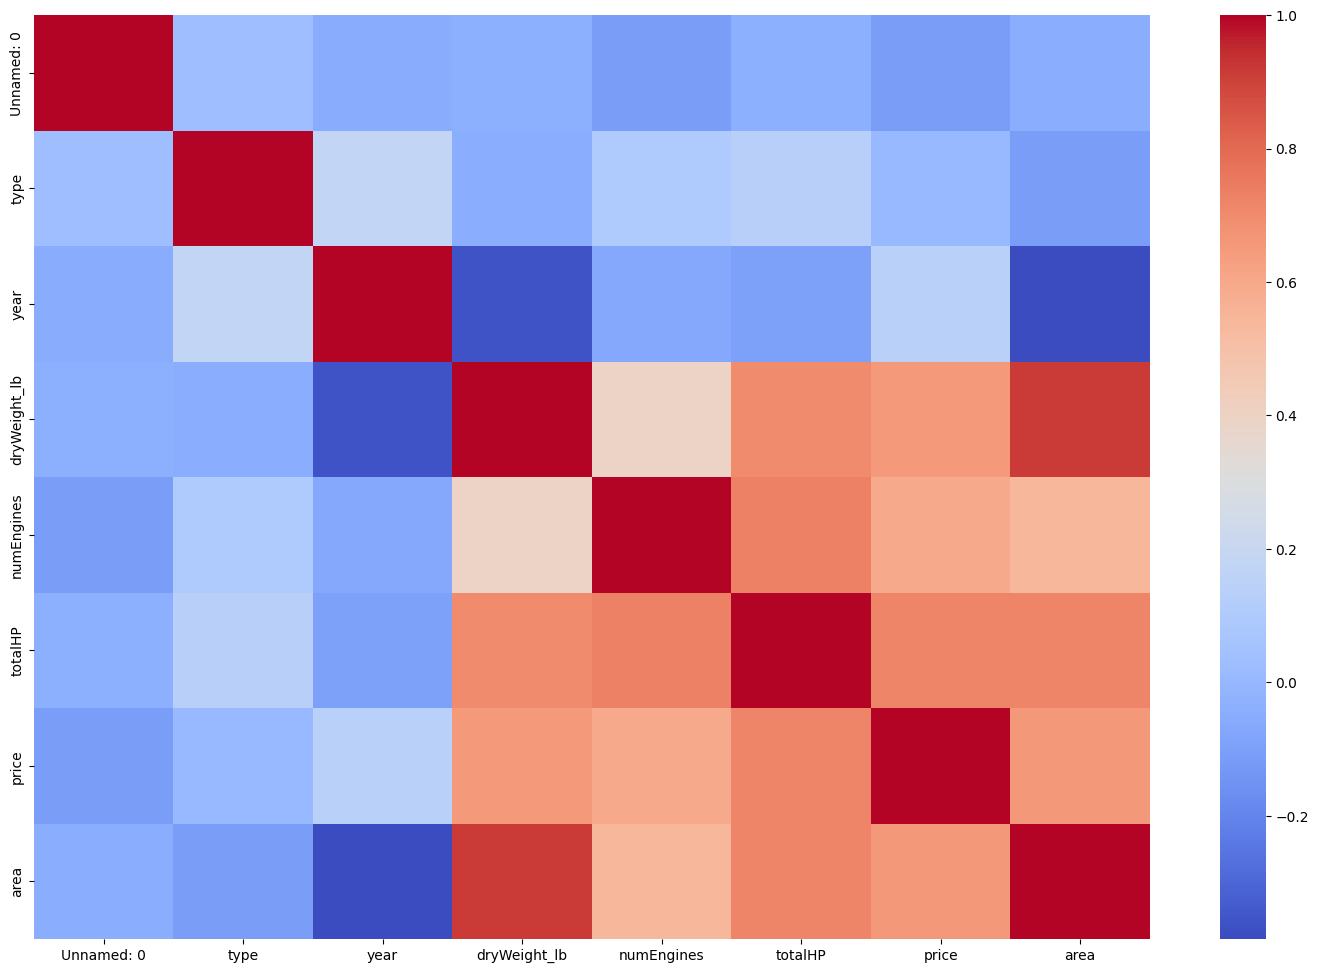

In [424]:
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot = False, cmap = 'coolwarm')

We can look at the price column and note features have higher correlation with price are'dryweight_lb', 'numEngines', 'totalHP' and 'area'.

In [421]:
x = data.drop(['price'], axis = 1)
y = data['price']
xtrain,xtest,ytrain,ytest = train_test_split(x, y, train_size= 0.8)

In [422]:
# fitting the model
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9421455921095995

In [423]:
# checking the importance of each features 
model.feature_importances_

array([2.79837835e-02, 6.40584245e-05, 1.35360612e-01, 8.32610371e-02,
       1.03247744e-02, 5.11428675e-01, 2.31577059e-01])